In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# Problem 3

In [2]:
#Remove
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1', 0.0, 0.0)
mdl.node('2', 6.0, 0.0)
mdl.node('3', 10., 0.0)
mdl.node('4', 6.0, 6.0)
mdl.node('5', 10., 6.0)
mdl.node('6', 6.0, 10.)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['2'], n['4'])
mdl.beam('d', n['4'], n['5'])
mdl.beam('e', n['4'], n['6'])

mdl.hinge(e['a'], n['1'])
mdl.hinge(e['b'], n['2'])
mdl.hinge(e['b'], n['3'])
mdl.hinge(e['c'], n['4'])

mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['3'], ['x','y','rz'])
mdl.fix(n['5'], ['y'])
mdl.fix(n['6'], ['x'])

mdl.numDOF()
em.analysis.characterize(mdl)
mdl.DOF

m = 1
s = 2


[[11, 12, 13], [1, 2, 3], [14, 15, 16], [4, 5, 6], [7, 17, 8], [18, 9, 10]]

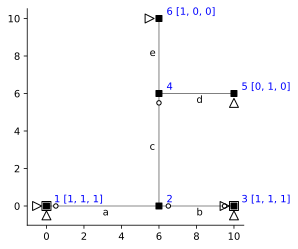

In [3]:
#Remove
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [4]:
# Matrices
B = em.B_matrix(mdl)
A = em.A_matrix(mdl)
# Vectors
Q = em.column_vector(B)
V = em.V_vector(A)

## 3 Find $A_{cm}$

In [5]:
ker = A.c.ker
A_cm = ker/ ker[5]
A_cm

,$1$
$1$,0.000000
$2$,-4.000000
$3$,-0.666667
$4$,4.000000
$5$,-4.000000
$6$,1.000000
$7$,4.000000
$8$,1.000000
$9$,-4.000000
$10$,1.000000


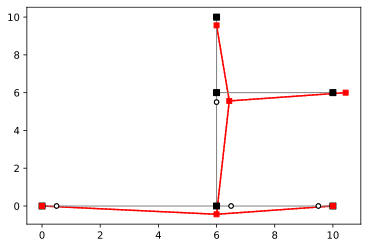

In [6]:
em.plot_U(mdl, ker, ax, scale=1)

# Part 4

In [7]:
A_m = A.f@A_cm

In [8]:
A_m

,$1$
$a_1$,0.000000e+00
$a_2$,6.666667e-01
$a_3$,0.000000e+00
$b_1$,0.000000e+00
$b_2$,-1.666667e+00
$b_3$,-1.000000e+00
$c_1$,0.000000e+00
$c_2$,0.000000e+00
$c_3$,1.666667e+00
$d_1$,1.000000e-14
